In [34]:
# Assignment Overview

# You will have to work with two primary datasets:
# 1. Bitcoin Market Sentiment Dataset
# o Columns: Date, Classification (Fear/Greed
# 2. Historical Trader Data from Hyperliquid
# o Columns include: account, symbol, execution price, size, side, time, 
# start position, event, closedPnL, leverage, etc.
# Your objective is to explore the relationship between trader performance and market 
# sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading 
# strategies.


In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
data_sent = pd.read_csv('fear_greed_index.csv')
data_hist = pd.read_csv('historical_data.csv')

In [36]:
data_sent.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [37]:
print(f'The data_sent has {data_sent.shape[0]} rows and {data_sent.shape[1]} columns')

The data_sent has 2644 rows and 4 columns


In [38]:
data_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [39]:
# date needs to be converted into datetime
# no missing values
# mapping of classification values

In [40]:
data_sent.nunique()

timestamp         2644
value               90
classification       5
date              2644
dtype: int64

In [41]:
data_sent['classification'].value_counts().unique

<bound method Series.unique of classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64>

In [42]:
data_hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [43]:
print(f'The data_hist has {data_hist.shape[0]} rows and {data_hist.shape[1]} columns')

The data_hist has 211224 rows and 16 columns


In [44]:
data_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [45]:
data_hist.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [46]:
data_hist.nunique()

Account                 32
Coin                   246
Execution Price      60162
Size Tokens          59304
Size USD            118493
Side                     2
Timestamp IST        27977
Start Position      196923
Direction               12
Closed PnL           90720
Transaction Hash    101184
Order ID             50555
Crossed                  2
Fee                 138802
Trade ID              2810
Timestamp                7
dtype: int64

In [47]:
# converting timestamp IST into datetime
data_hist['Timestamp IST'] = pd.to_datetime(data_hist['Timestamp IST'],format = '%d-%m-%Y %H:%M')

In [48]:
# extracting date
data_hist['Trade Date'] = data_hist['Timestamp IST'].dt.date.astype(str)

In [49]:
data_hist.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Trade Date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02


In [50]:
# categorising the classification in sentiment data
data_sent['classification'].value_counts()

classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64

In [51]:
def new_classification(Classification):
    if 'Fear' in Classification:
        return 'Fear'
    elif 'Greed' in Classification:
        return 'Greed'
    else:
        return 'Neutral'
    
data_sent['Sentiment'] = data_sent['classification'].apply(new_classification)   

In [52]:
data_sent['Sentiment'].value_counts()

Sentiment
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64

In [53]:
data_sent.head()

,timestamp,value,classification,date,Sentiment
0,1517463000,30,Fear,2018-02-01,Fear
1,1517549400,15,Extreme Fear,2018-02-02,Fear
2,1517635800,40,Fear,2018-02-03,Fear
3,1517722200,24,Extreme Fear,2018-02-04,Fear
4,1517808600,11,Extreme Fear,2018-02-05,Fear


In [54]:
# Merging the two datasets
merged_data = data_hist.merge(data_sent[['date', 'Sentiment']],left_on = 'Trade Date', right_on = 'date', how = 'left')

In [55]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Trade Date,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,Greed


In [57]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [59]:
merged_data.drop(['Transaction Hash', 'Order ID', 'Trade ID'], axis = 1)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Crossed,Fee,Timestamp,Trade Date,date,Sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0000,True,0.345404,1.730000e+12,2024-12-02,2024-12-02,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0000,True,0.005600,1.730000e+12,2024-12-02,2024-12-02,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0000,True,0.050431,1.730000e+12,2024-12-02,2024-12-02,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0000,True,0.050043,1.730000e+12,2024-12-02,2024-12-02,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0000,True,0.003055,1.730000e+12,2024-12-02,2024-12-02,Greed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,2025-04-25 15:35:00,7546.600000,Close Long,-20.2566,False,0.042080,1.750000e+12,2025-04-25,2025-04-25,Greed
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,2025-04-25 15:35:00,7164.400000,Close Long,-112.5773,False,0.233863,1.750000e+12,2025-04-25,2025-04-25,Greed
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,2025-04-25 15:35:00,5040.300000,Close Long,-22.4402,False,0.046616,1.750000e+12,2025-04-25,2025-04-25,Greed
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,2025-04-25 15:35:00,4616.900000,Close Long,-190.7894,False,0.396337,1.750000e+12,2025-04-25,2025-04-25,Greed


In [60]:
merged_data['Closed PnL'] = pd.to_numeric(merged_data['Closed PnL'], errors = 'coerce')
merged_data['Size USD'] = pd.to_numeric(merged_data['Size USD'], errors = 'coerce')

In [65]:
merged_data.describe()

,Execution Price,Size Tokens,Size USD,Timestamp IST,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,211224,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,2025-01-31 12:04:22.915009792,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
min,0.000005,8.740000e-07,0.000000e+00,2023-05-01 01:06:00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,2024-12-31 21:00:45,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,2025-02-24 18:55:00,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,2025-04-02 18:22:00,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,2025-05-01 12:13:00,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12
std,29447.654868,1.042729e+05,3.657514e+04,NaN,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09


In [ ]:
# Analysing Stats
# Finding Avg profit, Avg Trade Size, Trade Count and Trade Rate w.r.t Sentiment

In [66]:
stats = merged_data.groupby('Sentiment').agg(Avg_PnL=('Closed PnL', 'mean'),
    Avg_Trade_Size_USD=('Size USD', 'mean'),
    Trade_Count=('Account', 'count'),
    Loss__Trade_Rate=('Closed PnL', lambda x: (x < 0).sum() / len(x) * 100)
).reset_index()

In [67]:
stats

,Sentiment,Avg_PnL,Avg_Trade_Size_USD,Trade_Count,Loss__Trade_Rate
0,Fear,49.212077,7182.011019,83237,7.525499
1,Greed,53.882281,4574.424490,90295,8.945124
2,Neutral,34.307718,4782.732661,37686,8.485910


In [69]:
# Visualising the data

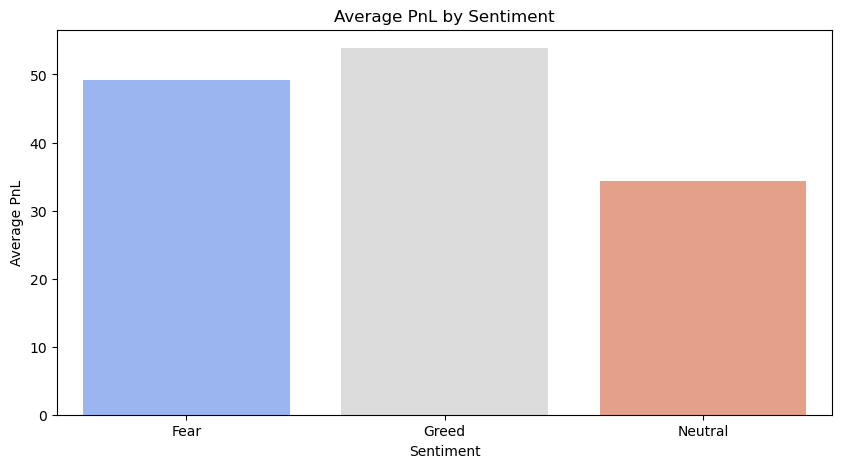

In [141]:
plt.figure(figsize=(10, 5))
sns.barplot(data=stats, x='Sentiment', y='Avg_PnL', palette='coolwarm')
plt.title('Average PnL by Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Sentiment')
plt.show()


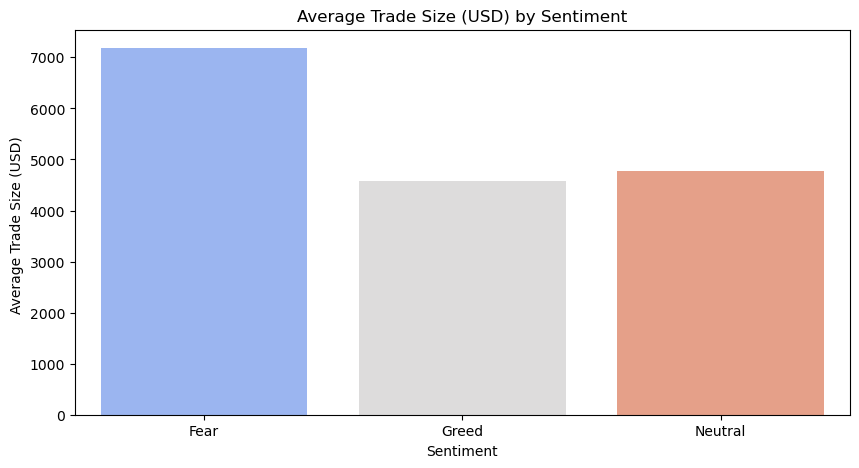

In [75]:
plt.figure(figsize=(10, 5))
sns.barplot(data=stats, x='Sentiment', y='Avg_Trade_Size_USD', palette='coolwarm')
plt.title('Average Trade Size (USD) by Sentiment')
plt.ylabel('Average Trade Size (USD) ')
plt.xlabel('Sentiment')
plt.show()

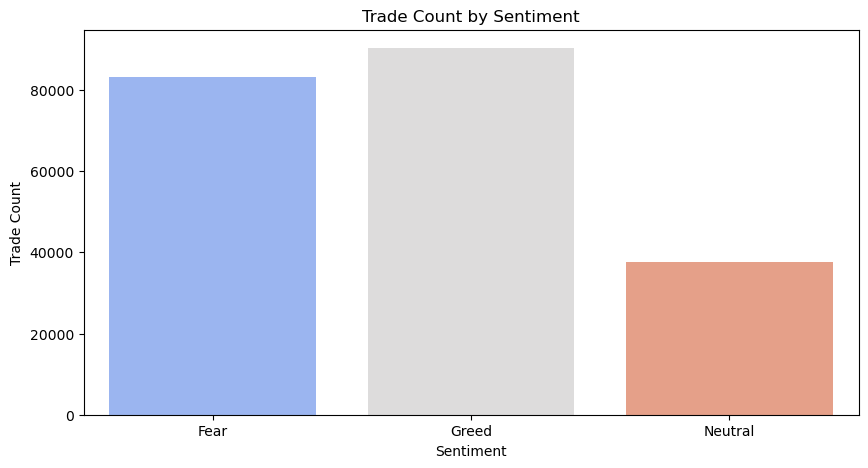

In [76]:
plt.figure(figsize=(10, 5))
sns.barplot(data=stats, x='Sentiment', y='Trade_Count', palette='coolwarm')
plt.title('Trade Count by Sentiment')
plt.ylabel('Trade Count')
plt.xlabel('Sentiment')
plt.show()

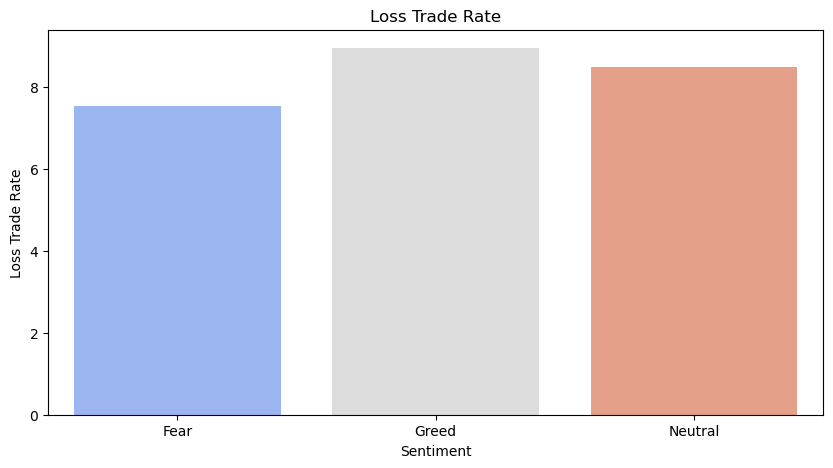

In [78]:
plt.figure(figsize=(10, 5))
sns.barplot(data=stats, x='Sentiment', y='Loss__Trade_Rate', palette='coolwarm')
plt.title('Loss Trade Rate')
plt.ylabel('Loss Trade Rate')
plt.xlabel('Sentiment')
plt.show()

In [82]:
merged_data['Side'].value_counts()

Side
SELL    108528
BUY     102696
Name: count, dtype: int64

In [ ]:
# Analysing Buying/Selling, Fees, and Top Traders w.r.t Sentiment

In [89]:
buy_sell_stats = merged_data.groupby(['Sentiment','Side']).size().unstack()

In [96]:
print('Buy and Sell Stats:\n', buy_sell_stats)

Buy and Sell Stats:
 Side         BUY   SELL
Sentiment              
Fear       41205  42032
Greed      42516  47779
Neutral    18969  18717


In [97]:
fees_stats = merged_data.groupby('Sentiment').agg(Avg_Fee = ('Fee', 'mean')).reset_index()
print('Fee Stats:\n', fees_stats)

Fee Stats:
   Sentiment   Avg_Fee
0      Fear  1.397763
1     Greed  0.998166
2   Neutral  1.044798


In [100]:
top_traders = merged_data.groupby(['Sentiment', 'Account']).agg(
    Avg_PnL=('Closed PnL', 'mean'),
    Trade_Count=('Closed PnL', 'count')
).reset_index()
top_traders

,Sentiment,Account,Avg_PnL,Trade_Count
0,Fear,0x083384f897ee0f19899168e3b1bec365f52a9012,659.287949,1878
1,Fear,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,-2.110992,2792
2,Fear,0x271b280974205ca63b716753467d5a371de622ab,17.571781,2665
3,Fear,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,-6.205518,1973
4,Fear,0x2c229d22b100a7beb69122eed721cee9b24011dd,31.226042,493
...,...,...,...,...
89,Neutral,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,116.086038,3457
90,Neutral,0xb899e522b5715391ae1d4f137653e7906c5e2115,12.796016,314
91,Neutral,0xbaaaf6571ab7d571043ff1e313a9609a10637864,13.435312,4270
92,Neutral,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,-218.650251,413


In [123]:
top_5_traders_per_sentiment = top_traders[top_traders['Trade_Count']>=20].sort_values(['Sentiment', 'Avg_PnL'], ascending=[True, False]).head(5)
top_5_traders_per_sentiment

,Sentiment,Account,Avg_PnL,Trade_Count
8,Fear,0x420ab45e0bd8863569a5efbb9c05d91f40624641,686.222394,159
0,Fear,0x083384f897ee0f19899168e3b1bec365f52a9012,659.287949,1878
16,Fear,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,526.709979,652
11,Fear,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,194.575198,2382
30,Fear,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,175.070313,1568


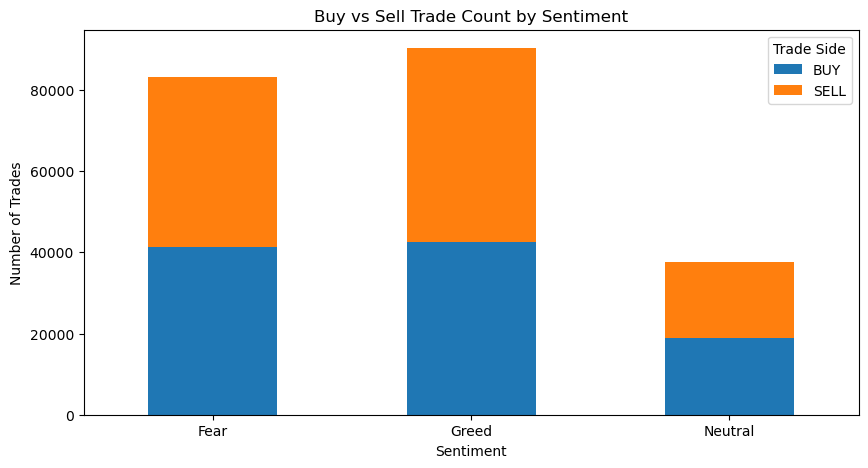

In [127]:
# Visualization
buy_sell_stats.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Buy vs Sell Trade Count by Sentiment')
plt.ylabel('Number of Trades')
plt.xlabel('Sentiment')
plt.xticks(rotation=0)
plt.legend(title='Trade Side')
plt.show()

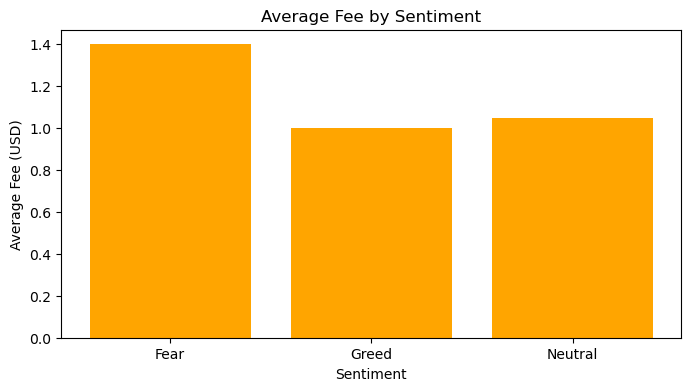

In [126]:
plt.figure(figsize=(8, 4))
plt.bar(fees_stats['Sentiment'], fees_stats['Avg_Fee'], color='orange')
plt.title('Average Fee by Sentiment')
plt.ylabel('Average Fee (USD)'')
plt.xlabel('Sentiment')
plt.show()

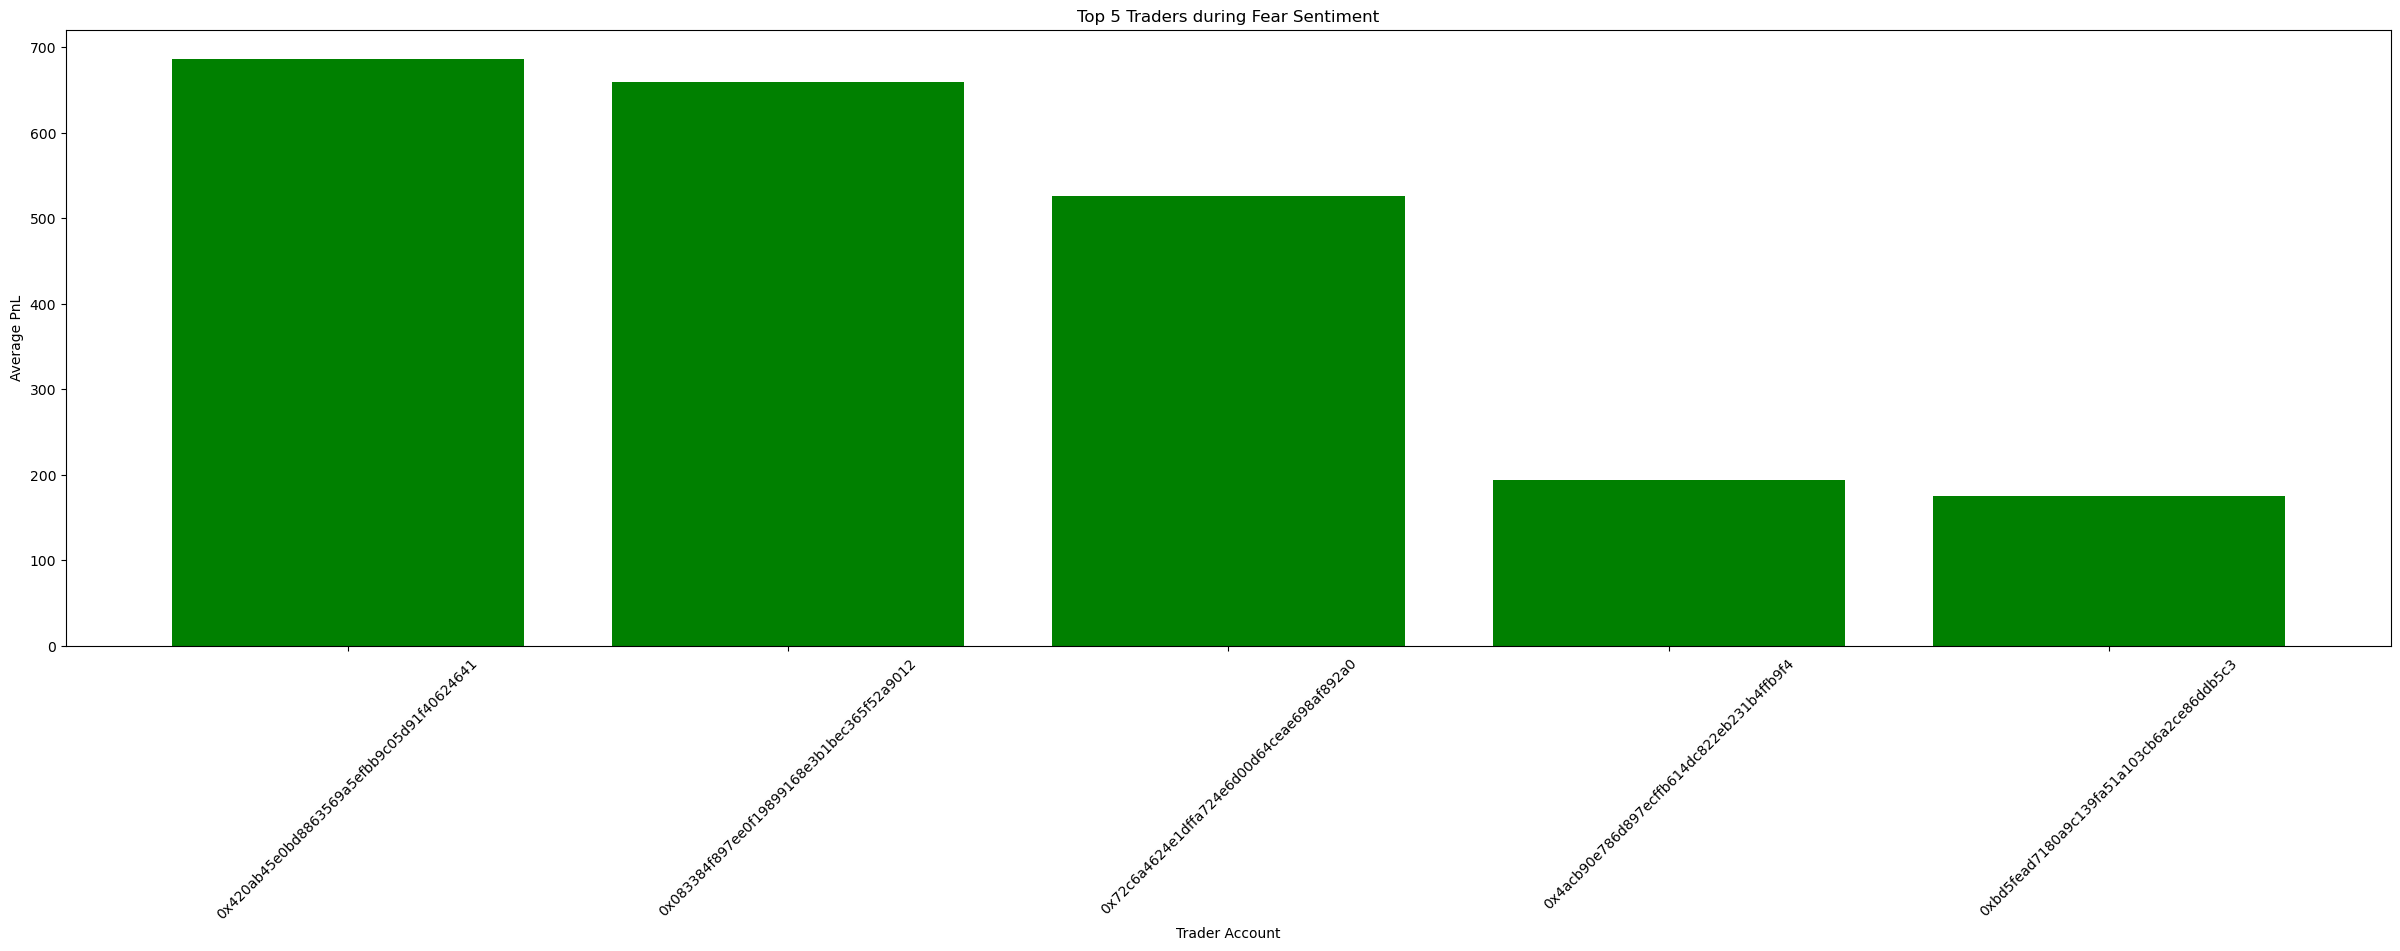

In [138]:
for sentiment in top_5_traders_per_sentiment['Sentiment'].unique():
    subset = top_5_traders_per_sentiment[top_5_traders_per_sentiment['Sentiment'] == sentiment]
    plt.figure(figsize=(30,8))
    plt.bar(subset['Account'], subset['Avg_PnL'], color='green')
    plt.title(f'Top 5 Traders during {sentiment} Sentiment')
    plt.ylabel('Average PnL')
    plt.xlabel('Trader Account')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# PnL over Time Analysis

In [143]:
avg_daily_pnl = merged_data.groupby(['Trade Date', 'Sentiment'])['Closed PnL'].mean().reset_index()
avg_daily_pnl

,Trade Date,Sentiment,Closed PnL
0,2023-05-01,Greed,0.000000
1,2023-12-05,Greed,0.000000
2,2023-12-14,Greed,-18.675885
3,2023-12-15,Greed,-12.316017
4,2023-12-16,Greed,0.000000
...,...,...,...
474,2025-04-27,Greed,8.018004
475,2025-04-28,Neutral,26.763462
476,2025-04-29,Greed,56.063136
477,2025-04-30,Greed,12.582028


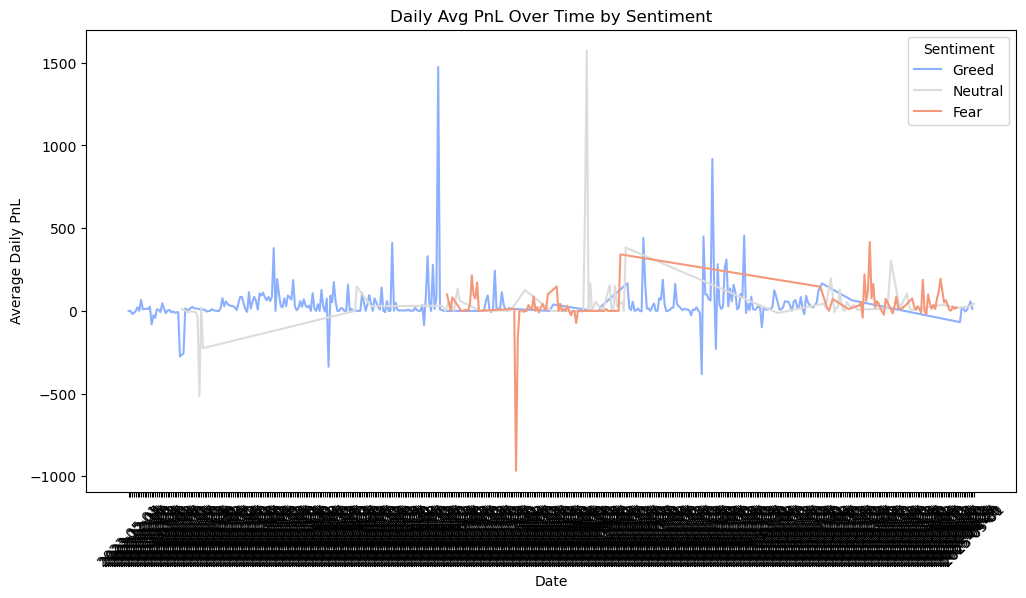

In [144]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_daily_pnl, x='Trade Date', y='Closed PnL', hue='Sentiment', palette='coolwarm')
plt.title('Daily Avg PnL Over Time by Sentiment')
plt.ylabel('Average Daily PnL')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

In [145]:
# Box Plot Distribution of PnL by Sentiment

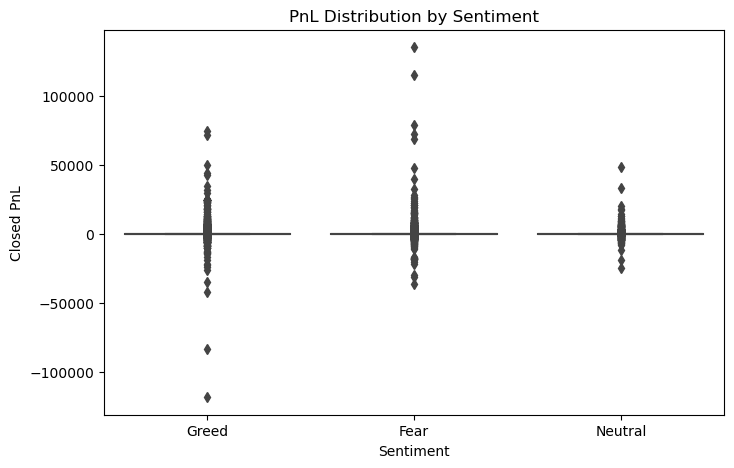

In [147]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_data, x='Sentiment', y='Closed PnL', palette='bright')
plt.title('PnL Distribution by Sentiment')
plt.ylabel('Closed PnL')
plt.xlabel('Sentiment')
plt.show()

# Key Findings

In [ ]:
#As per Bar Charts:
# Highest average profit is made by Greed however they have highest loss trade rate with maximum Trades
# Good average profit is made by Fear with lowest loss rate with good count of trades
# Neutral is giving the lowest average profit with lowest count of trades and still loss trade rate at higher side
# Greed is buying more trades
# Fear is selling more trades
# Neutral is Balanced
# Fear is having paying high Fee followed by Neutral and Greed
# Top 5 Traders are from Fear Sentiment

# As per line Chart:
# Avg PnL spikes in Greed, more of Positive Trend
# Avg PnL in Fear is more volatile or Declining

# As per Box Plot:
# Greed has the widest distribution indicates higher upside and higher variance in outcomes (Outliers)
#Fear and Neutral have tighter spreads, suggesting more consistent returns.